In [1]:
import os
import cv2
import numpy as np

# data_dir = "C://Users//BASAVADEEPTHI H M//Downloads//Smart-Flood-Detector-master//Smart-Flood-Detector-master//Code//data (1)//data//train"
data_dir = r"C:\Users\tejad\OneDrive\Desktop\AIE\semester 6\DLS\floodDetector\dl_dataset\train"

categories = ["flooded", "nonflooded"]

X = []
y = []
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path)
        print("\r",os.path.exists(img_path),end="  ")
        print("\r",img_path,end="   ")
        try:
          img = cv2.resize(img, (64, 64))
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          img = img.astype("float32") / 255.0
          X.append(img)
          y.append(categories.index(category))
        except:
          print(img)

X = np.array(X)
y = np.array(y)

# Step 2: Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


 C:\Users\tejad\OneDrive\Desktop\AIE\semester 6\DLS\floodDetector\dl_dataset\train\nonflooded\8223.JPG   

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential  # Import the Sequential class
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

# Rest of the code remains unchanged


In [4]:
# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Define the MLP classifier with Dropout regularization
model = Sequential()
model.add(Flatten(input_shape=(64, 64, 3)))
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))  # Adding Dropout regularization with rate 0.5
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))  # Adding Dropout regularization with rate 0.5
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [5]:
# Step 4: Add learning rate scheduling using ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=0.00001)

# Step 5: Train the MLP classifier with regularization and learning rate scheduling
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=12, callbacks=[reduce_lr])

Epoch 1/30
31/31 [==============================] - 9s 234ms/step - loss: 4.2605 - accuracy: 0.4731 - val_loss: 1.5779 - val_accuracy: 0.4574 - lr: 0.0010
Epoch 2/30
31/31 [==============================] - 7s 224ms/step - loss: 2.8294 - accuracy: 0.5027 - val_loss: 1.7296 - val_accuracy: 0.4574 - lr: 0.0010
Epoch 3/30
31/31 [==============================] - 7s 223ms/step - loss: 1.4859 - accuracy: 0.5000 - val_loss: 0.6655 - val_accuracy: 0.5426 - lr: 0.0010
Epoch 4/30
31/31 [==============================] - 7s 216ms/step - loss: 1.1199 - accuracy: 0.5108 - val_loss: 0.8716 - val_accuracy: 0.5426 - lr: 0.0010
Epoch 5/30
31/31 [==============================] - 7s 214ms/step - loss: 0.9687 - accuracy: 0.5296 - val_loss: 0.7111 - val_accuracy: 0.5426 - lr: 0.0010
Epoch 6/30
31/31 [==============================] - ETA: 0s - loss: 0.8103 - accuracy: 0.5269
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
31/31 [==============================] - 7s 215ms/step

In [7]:
# Step 5: Evaluate the MLP classifier on the test set
loss, accuracy = model.evaluate(X_test, y_test)

print("Accuracy: ", str(accuracy)[:5])
print("Loss: ", str(loss)[:5])

4/4 [==============================] - 0s 16ms/step - loss: 0.5020 - accuracy: 0.7863
Accuracy:  0.786
Loss:  0.502


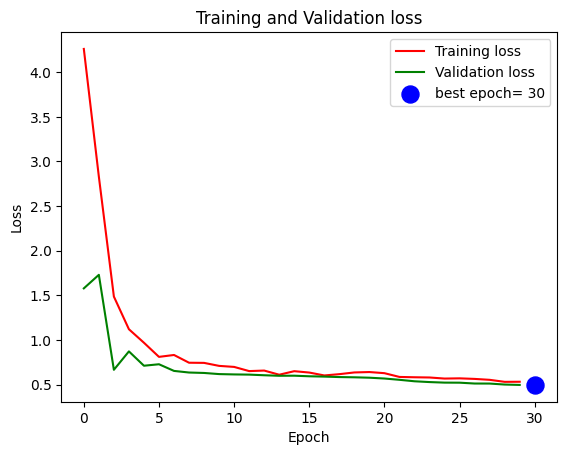

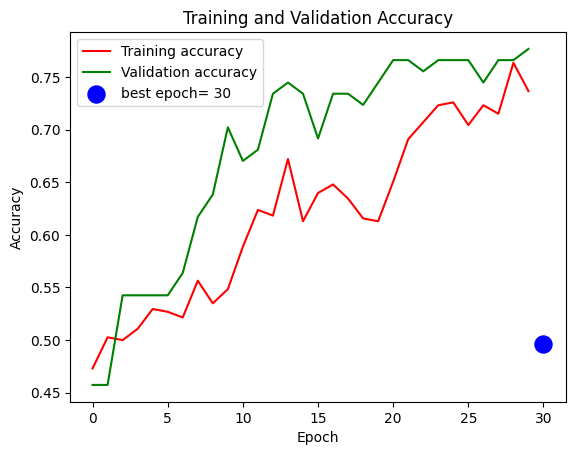

In [8]:
# Make a plot of training loss and validation loss to check for the regular fit of the trained network
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
loss_label = f'best epoch= {str(index_loss + 1)}'


plt.plot(history.history['loss'],'r', label='Training loss')
plt.plot(history.history['val_loss'],'g', label='Validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)

plt.legend()
plt.show()

# Make a plot of training accuracy and validation accuracy to check for the regular fit of the trained network
plt.plot(history.history['accuracy'],'r', label='Training accuracy')
plt.plot(history.history['val_accuracy'],'g', label='Validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)

plt.legend()
plt.tight_layout
plt.show()


In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

4/4 [==============================] - 0s 13ms/step
Confusion Matrix:
[[47 18]
 [ 7 45]]
Precision: 0.7142857142857143
F1 Score: 0.7826086956521738
Recall: 0.8653846153846154
Accuracy: 0.7863247863247863


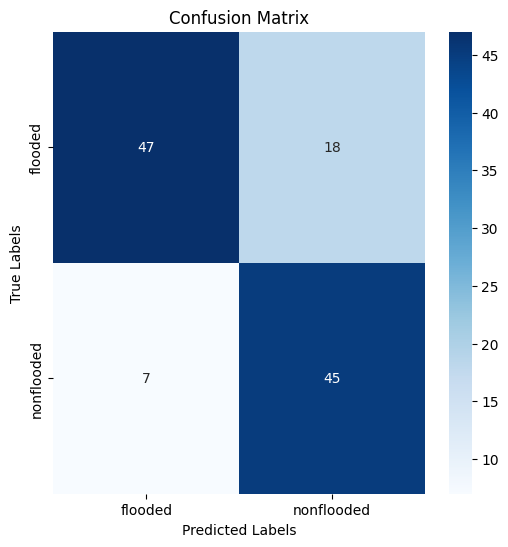

In [11]:
# Step 6: Predict probabilities for the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Step 7: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 8: Calculate precision, F1 score, recall, and accuracy
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("F1 Score:", f1)
print("Recall:", recall)
print("Accuracy:", accuracy)

# Step 9: Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


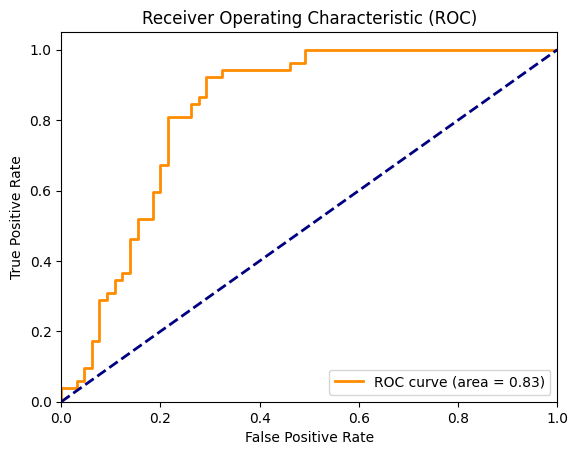

In [12]:
# Step 10: Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Step 11: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
